## Hasan Mahabub Sayem

Project #1 (Assignment #12)
___________
Dataset link: https://www.kaggle.com/datasets/mirichoi0218/insurance
1. Do visualization and analysis to understand the dataset 
Follow the kaggle code for inspiration: 
https://www.kaggle.com/code/trisha12/regression-random-forest-and-boosting-model

2. Apply polynomial regression to predict & test

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [514]:
df = pd.read_csv('./data/insurance.csv')

In [515]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


__age:__ age of primary beneficiary

__sex:__ insurance contractor gender, female, male

__bmi:__ Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

__children:__ Number of children covered by health insurance / Number of dependents

__smoker:__ Smoking

__region:__ the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

__charges:__ Individual medical costs billed by health insurance

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [517]:
df.shape

(1338, 7)

In [518]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [519]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [520]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


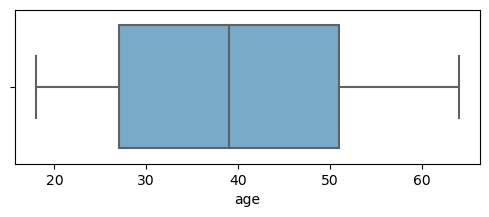

In [521]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['age'], palette='Blues_r')
plt.show()

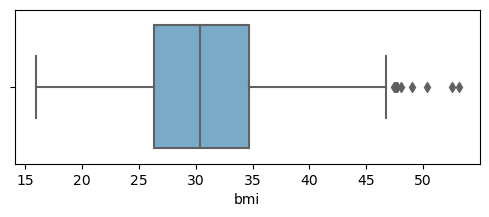

In [522]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['bmi'], palette='Blues_r')
plt.show()

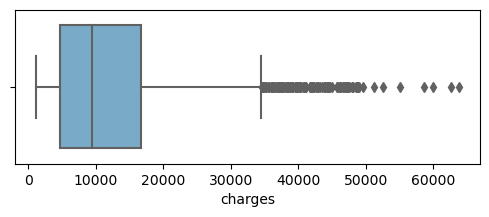

In [523]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['charges'], palette='Blues_r')
plt.show()

Skewed distribution in charges column. And outlier present on right side.

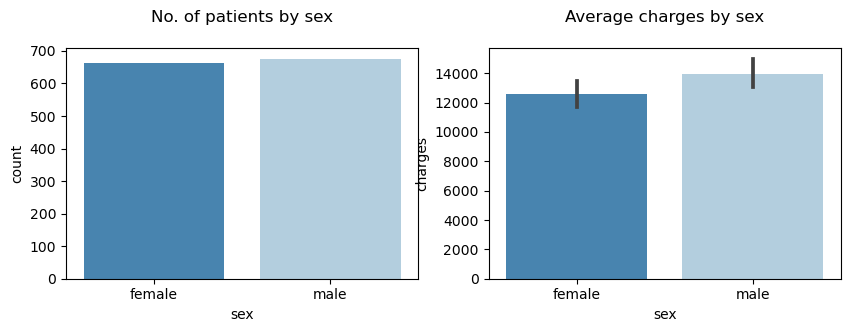

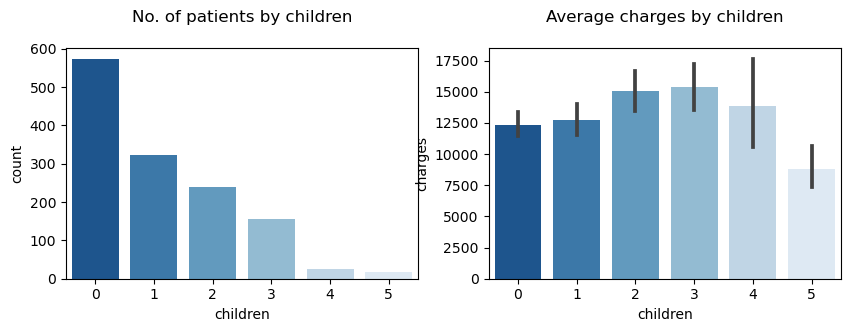

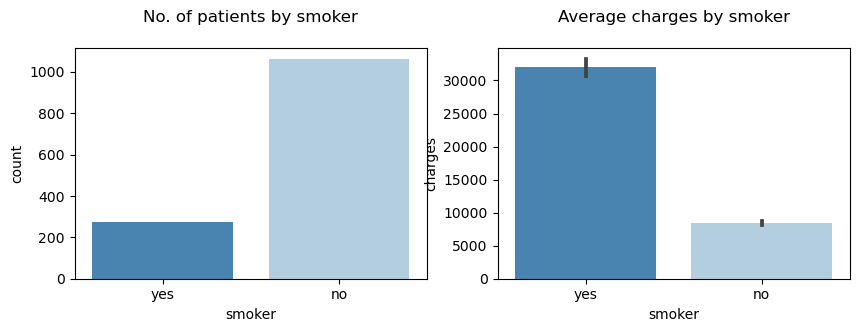

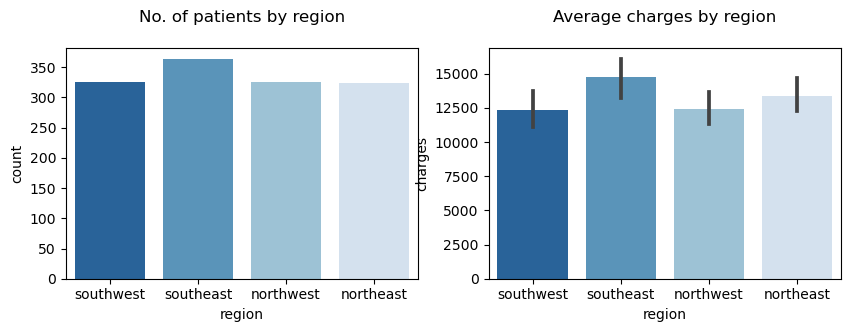

In [524]:
c_feature = ['sex','children', 'smoker', 'region']

# fig, axs = plt.subplots(2,2,figsize=(8,8))
# plt.subplots_adjust(hspace=0.5)

for f in c_feature:
    fig, axs = plt.subplots(1,2,figsize=(10,3))
    axs[0].title.set_text(f'No. of patients by {f}\n')
    sns.countplot(x=df[f], ax = axs[0], palette='Blues_r')
    
    axs[1].title.set_text(f'Average charges by {f}\n')
    sns.barplot(x=df[f],y =df['charges'], ax = axs[1], palette='Blues_r')
    plt.show()

    

__Interpretation:__
1. Though no. male and female patient are almost same, the average charge for men a little bit higher.
2. Non-smoker patient is a lot more than smoker. This can happen if people ont that area are non-smoker
3. Charges for smoker patient a lot higher. So there is a strong relation between 'charges' and their smoking habit
4. Different region have different average charges.

<Figure size 1200x600 with 0 Axes>

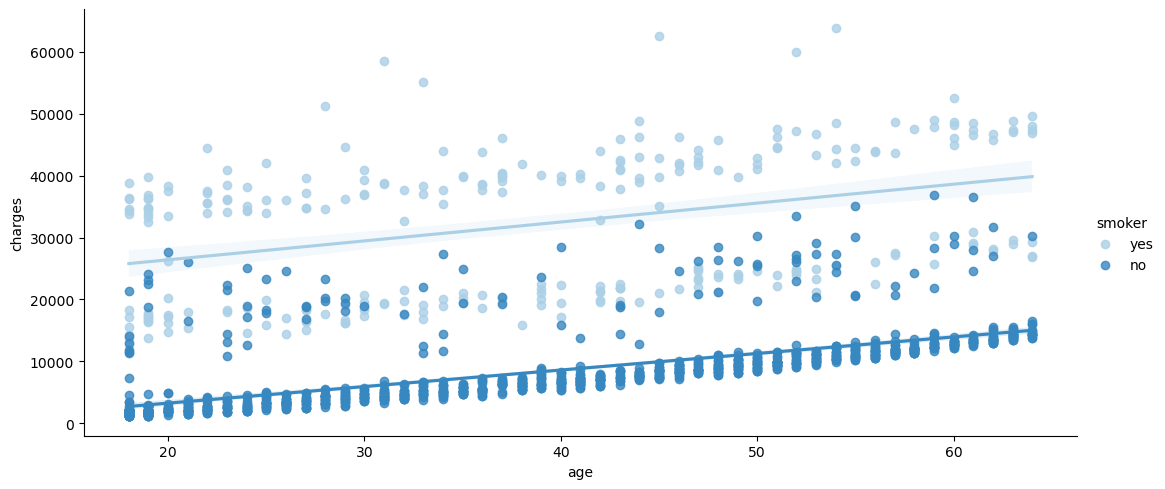

In [525]:
plt.figure(figsize=(12,6))
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues', data=df , aspect=2.2)
plt.show()

linear regression between age and charges of smoker and non smoker seemed parallel, at the same time intercept for smoker higher than non-smoker.

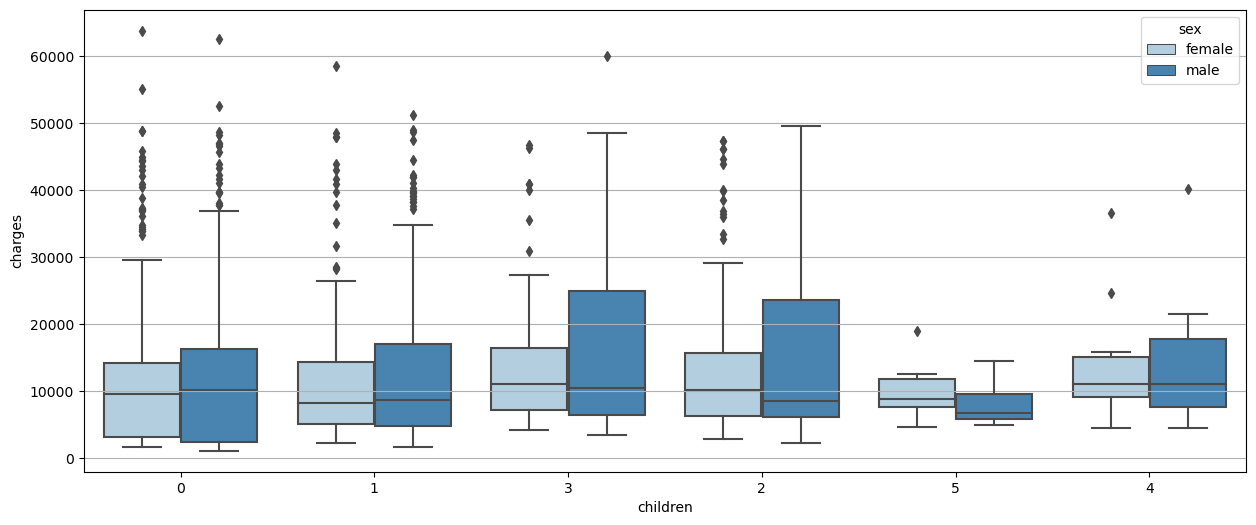

In [526]:
plt.figure(figsize=(15,6))
plt.grid(visible=True)
sns.boxplot( x=df['children'].astype('str'), y=df['charges'], palette='Blues', hue=df['sex'])
plt.show()

Interpretation:

    1. Female with more child has higher cost than male.

## FE

### Outlier handling

I have tested both with or without removing the outlier. The model perform better if we don't remove the outliers. So we gonna skip this part.

In [527]:
# q1, q3 = df.charges.quantile([.25,.75])
# iqr = q3 - q1

# l_fence = df.charges.min()
# u_fence = q3 + (1.5 * iqr)
# l_fence, u_fence

In [528]:
# df = df[(df.charges >= l_fence) & (df.charges <= u_fence)]

In [529]:
df.shape

(1338, 7)

### Data Binning

In [530]:
age_bin = pd.DataFrame(df['age'])

cut_labels = ['teenage', 'young adullt', 'mid-age adult', 'old']
cut_bins = [0, 18, 35, 55, df.age.max()]

age_bin['age_cat'] = pd.cut(age_bin['age'], bins=cut_bins, labels=cut_labels)
age_bin.drop('age', axis=1, inplace= True)
age_bin

,age_cat
0,young adullt
1,teenage
2,young adullt
3,young adullt
4,young adullt
...,...
1333,mid-age adult
1334,teenage
1335,teenage
1336,young adullt


In [531]:
bmi_bin = pd.DataFrame(df['bmi'])

cut_labels = ['underweight', 'healthy', 'overweight', 'obese', 'extremely overweight']
cut_bins = [1, 18, 24, 29,39, 65]

bmi_bin['bmi_cat'] = pd.cut(bmi_bin['bmi'], bins=cut_bins, labels=cut_labels)
bmi_bin.drop('bmi', axis=1, inplace= True)
bmi_bin

,bmi_cat
0,overweight
1,obese
2,obese
3,healthy
4,overweight
...,...
1333,obese
1334,obese
1335,obese
1336,overweight


In [532]:
x = pd.concat([df.drop(['age', 'bmi','charges'],axis=1), age_bin, bmi_bin], axis=1)
x 

,sex,children,smoker,region,age_cat,bmi_cat
0,female,0,yes,southwest,young adullt,overweight
1,male,1,no,southeast,teenage,obese
2,male,3,no,southeast,young adullt,obese
3,male,0,no,northwest,young adullt,healthy
4,male,0,no,northwest,young adullt,overweight
...,...,...,...,...,...,...
1333,male,3,no,northwest,mid-age adult,obese
1334,female,0,no,northeast,teenage,obese
1335,female,0,no,southeast,teenage,obese
1336,female,0,no,southwest,young adullt,overweight


In [533]:
x = pd.get_dummies(x)
x

,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_cat_teenage,age_cat_young adullt,age_cat_mid-age adult,age_cat_old,bmi_cat_underweight,bmi_cat_healthy,bmi_cat_overweight,bmi_cat_obese,bmi_cat_extremely overweight
0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1334,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1335,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1336,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [534]:
y = df['charges']

In [535]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [536]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [537]:
reg.score(x_test, y_test)

0.7593558320790235

In [538]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, reg.predict(x_test))

4607.6985535296135

In [539]:
from sklearn.preprocessing import PolynomialFeatures

val = pd.DataFrame(columns=['Deg', 'MEA','Score','MSE'])
for i in range(1,5):
    poly_reg = PolynomialFeatures(degree=i)
    
    # preprocessing train features
    x_poly = poly_reg.fit_transform(x_train)
    
    # preprocessing test features
    x_test_poly = poly_reg.fit_transform(x_test)
    
    # training model
    model_p = LinearRegression()
    model_p.fit(x_poly, y_train)
    format
    val = val.append({'Deg' : i, 
                      'MEA': format(mean_absolute_error(y_test, model_p.predict(x_test_poly)), '.2f'),
                      'Score' : format(model_p.score(x_test_poly, y_test) * 100, '.2f'),
                      'MSE' : format(mean_squared_error(y_test, model_p.predict(x_test_poly)), '.2f')}, 
                     ignore_index=True)
    
val
    
    

C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\4135180937.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append({'Deg' : i,
C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\4135180937.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append({'Deg' : i,
C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\4135180937.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append({'Deg' : i,
C:\Users\Acer\AppData\Local\Temp\ipykernel_9428\4135180937.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append({'Deg' : i,


,Deg,MEA,Score,MSE
0,1,4607.70,75.94,41122713.81
1,2,3118.58,83.79,27693120.73
2,3,3626589906002.04,-708369704439197990912.00,1210504492001723351446847488.00
3,4,3883212165630.41,-287444650492512567296.00,491202600058283368577499136.00


With different test and train set, only the 1st degree shows consistence low error and high accuracy. Rest aren't consistent. Sometimes they are good ,even better than 1st degree. Sometimes they perform very bad.

__So, 1st degree aka 'Linear Regression' is the best fitted model.__